## REGULARIZATION 
To understand the concept of regularization techniques so that we can overcome the issue of overfitting or underfitting.

#### I tried to implement regularization technique on logistic regression 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Imported dataset

In [18]:
filename="./datasets/microship_QA.txt"
data=pd.read_csv(filename, sep=",", header=None)
data.columns = ["QA1", "QA2", "test_result"]
print("The first few values of the datasets\n")
print(data.head())

The first few values of the datasets

        QA1      QA2  test_result
0  0.051267  0.69956            1
1 -0.092742  0.68494            1
2 -0.213710  0.69225            1
3 -0.375000  0.50219            1
4 -0.513250  0.46564            1


In [19]:
training_data = np.loadtxt(filename, delimiter=',', dtype=float)
# storing data in row based arrays
X_train=np.c_[np.ones(training_data.shape[0]) ,training_data[:,:-1]].T
Y_train=np.c_[training_data[:,-1]].T
n=X_train.shape[0]
m=X_train.shape[1]
print("The number of features in our model (n):",n-1)
print("The number of training examples (m):",m)
#checking if our datasets are 
assert((X_train.shape[0]-1)==2)

The number of features in our model (n): 2
The number of training examples (m): 118


#### Understanding of the dataset
The data set contains results of two quality assurance results and the output is the results whether the chip had a defect or not. Much better understanding can be attained if we plot the data

#### Visualization of the dataset

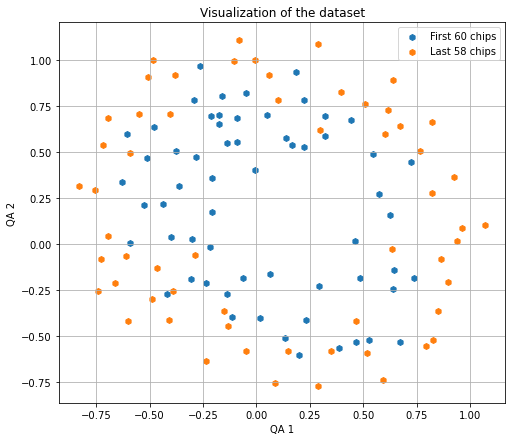

In [20]:
fig,ax =plt.subplots(figsize=(8,7))
ax.scatter(X_train[1,:60],X_train[2,:60],marker='h',label='First 60 chips')
ax.scatter(X_train[1,60:],X_train[2,60:],marker='h',label="Last 58 chips")

plt.xlabel("QA 1")
plt.ylabel("QA 2")
plt.title("Visualization of the dataset")
plt.legend()
plt.grid()

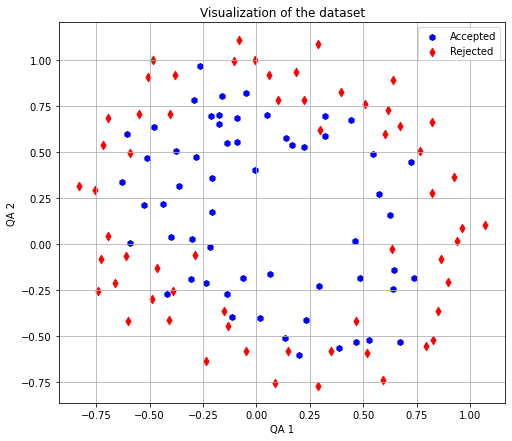

In [21]:
accepted_microship=training_data[training_data[:,-1]==1]
rejected_microship=training_data[training_data[:,-1]==0]
fig,ax =plt.subplots(figsize=(8,7))
ax.scatter(accepted_microship[:,0],accepted_microship[:,1],marker='h',color='b',label='Accepted')
ax.scatter(rejected_microship[:,0],rejected_microship[:,1],marker='d',color='r',label="Rejected")
plt.xlabel("QA 1")
plt.ylabel("QA 2")
plt.title("Visualization of the dataset")
plt.legend()
plt.grid()

### Analysis of the visualization 
  The data is centered from -1 to 1 and chips which a tolerance are accepted else rejected

### Building a logistic regression for this model would require higher order function 

if we use higher order function that the possibility of overfitting increase to avoid this we will use lasso regression technique (L1)

In [22]:
def sigmoid(z):
    '''
    Input:
    Z= value required to get sigmoid
    output:
    g= sigmoid function output
    '''
    g=1/(1+np.exp(-z))
    return g

assert(sigmoid(0)==0.5)

In [23]:
def hypothesis(X,weights):
    z=np.dot(weights.T,X)
    h=sigmoid(z)
    return h

In [24]:
def cost_function(X,Y,weights,lamda=0):
    '''
    This function calculates the cost function for logistic regression
    X= inputs (n,m)
    Y=(1,m)
    n= number of features\
    m=training examples
    '''
    m=Y.size
    #print(m)
    h=hypothesis(X,weights)
    #print(h.shape)
    #print(Y.shape)
    J=-(1/m)*(np.dot(Y,np.log(h).T)+np.dot((1-Y),np.log(1-h).T))+(lamda/(2*m))*np.sum(np.square(weights[1:,:]))
    return J.flatten()
## setting initial weight equal to zeros
weights=np.zeros((n,1))
print("Initial weights:", weights)
print("The cost function for initial weights:",cost_function(X_train,Y_train,weights,1))

Initial weights: [[0.]
 [0.]
 [0.]]
The cost function for initial weights: [0.69314718]


In [25]:
def grad(X,Y,weights,lamda=0):
    '''
    Calculates the gradients of the cost function 
    '''
    m=Y.size
    h=hypothesis(X,weights)
    grad=(1/m)*np.dot((h-Y),X.T)+(lamda/m)*np.r_[[[0]],weights[1:]].T
    return grad
print("The gradient of cost function for initial weights:",grad(X_train,Y_train,weights))
grd=grad(X_train,Y_train,weights,2)
assert(grd.shape[1]==n)

The gradient of cost function for initial weights: [[8.47457627e-03 1.87880932e-02 7.77711864e-05]]


In [26]:
## Performing ploynomial regression
def poly(X_input,degree):
    n=X_input.shape[0]
    m=X_input.shape[1]
    X=np.zeros((n*degree+1,m))
    j=0
    o=0
    for i in range(0,n*degree+1): 
        X[i,:]=X_input[j,:]**o
        if o<degree:
            o+=1
        else:
            j+=1
            o=1   
    return X
Test_mt=poly(training_data[:,:-1].T,2)
print("linear:",training_data[1,:-1])
print("quadratic",training_data[1,:-1]**2)
print("X_training matrix",Test_mt[:,1])

linear: [-0.092742  0.68494 ]
quadratic [0.00860108 0.4691428 ]
X_training matrix [ 1.         -0.092742    0.00860108  0.68494     0.4691428 ]


In [27]:
def gradient_descent(X,Y,weights,learning_rate=0.01,lamda=0,num_iteration=250):
    m=X.shape[1]
    loss=[]
    for i in range(0,num_iteration):
        dw=grad(X,Y,weights)
        weights-=learning_rate*dw.T
        J=cost_function(X,Y,weights,lamda)
        loss.append(J)
    return weights,loss
def logistic_regression(X,Y,learning_rate=0.01,lamda=0,num_iteration=250):
    m=X.shape[1]
    n=X.shape[0]
    initial_weights=np.zeros((n,1))
    weights,loss=gradient_descent(X,Y,initial_weights,learning_rate,lamda,num_iteration)
    plt.plot(np.arange(0,len(loss)),loss)
    plt.xlabel('Number of iteration N')
    plt.ylabel('Cost function J')
    plt.title("MINIMIZATION OF COST FUNCTION LR={}".format(learning_rate))
    return weights

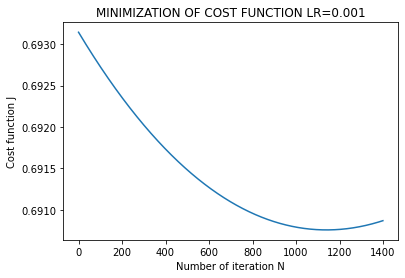

In [28]:
X_train=poly(training_data[:,:-1].T,2)
parameters=logistic_regression(X_train,Y_train,0.001,100,1400)

In [29]:
def predict(weights, X, threshold=0.5):
    h=hypothesis(X,weights)
    y= h >= threshold
    return(y.astype('int'))

In [30]:
p = predict(parameters, X_train) 
print('Accuracy of our model using gradient descent {}%'.format(100*sum((p == Y_train).ravel())/p.size))

Accuracy of our model using gradient descent 50.847457627118644%


In [31]:

def costFunctionR(weights, lamda, X,Y):
    m = Y.size
    h = sigmoid(X.dot(weights))
    
    J = -1*(1/m)*(np.log(h).T.dot(Y)+np.log(1-h).T.dot(1-Y)) + (lamda/(2*m))*np.sum(np.square(weights[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradientReg(weights, lamda, X,Y):
    m = Y.size
    h = sigmoid(X.dot(weights.reshape(-1,1)))
      
    grad = (1/m)*X.T.dot(h-Y) + (lamda/m)*np.r_[[[0]],weights[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [1]:
#building logistic regression model
from scipy.optimize import minimize
degree=3
lamda=1
X_train=poly(training_data[:,:-1].T,degree)
weights=np.zeros((X_train.shape[0],1))

model = minimize(costFunctionR, weights.T, args=(lamda,X_train.T,Y_train.T), method=None, jac=gradientReg, options={'maxiter':5000})
model_parameters=model.x
print("The parameters obtained from using minimize function in scipy which solves constrianed based problems",model_parameters)

NameError: name 'poly' is not defined

In [ ]:
p = predict(model_parameters, X_train) 
print('Accuracy of our model using other constrained based optimization algorthims {}%'.format(100*sum((p == Y_train).ravel())/p.size))

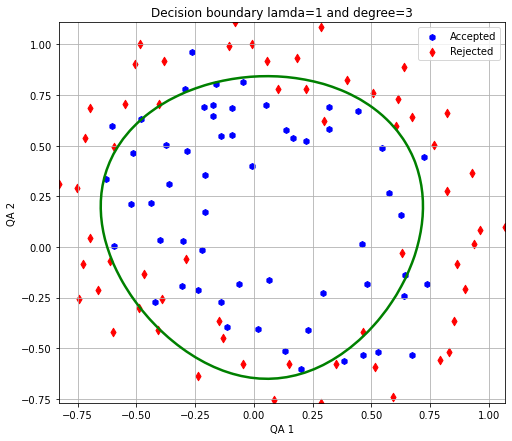

In [34]:
accepted_microship=training_data[training_data[:,-1]==1]
rejected_microship=training_data[training_data[:,-1]==0]
X_train=training_data[:,:-1].T
fig,ax =plt.subplots(figsize=(8,7))
ax.scatter(accepted_microship[:,0],accepted_microship[:,1],marker='h',color='b',label='Accepted')
ax.scatter(rejected_microship[:,0],rejected_microship[:,1],marker='d',color='r',label="Rejected")
x1,x2=np.meshgrid(np.linspace(X_train[0,:].min(),X_train[0,:].max()),np.linspace(X_train[1,:].min(),X_train[1,:].max()))
X_DC1=np.c_[x1.ravel(), x2.ravel()].T
X_DC=poly(X_DC1,degree)
h = hypothesis(X_DC,model_parameters).reshape(x1.shape)
plt.contour(x1, x2, h, [0.5], linewidths=2.5, colors='g')
plt.xlabel("QA 1")
plt.ylabel("QA 2")
plt.title("Decision boundary lamda={} and degree={}".format(lamda,degree))
plt.legend()
plt.grid()